# Download and visualize the data

This notebook shows how to download public data from dropbox to the local machine and do basic manipulations

### Add the src folder to the path

In [1]:
import sys
import os

root_path = os.path.dirname(os.getcwd())
src_path = os.path.join(root_path, "src")
sys.path.insert(0, src_path)

%load_ext autoreload
%autoreload 2

### Read in the config file

In [2]:
import yaml
with open("./config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
    
print(yaml.dump(config))

data:
  DROPOUT_RATE:
  - 0.0
  - 0.4
  ELASTIC_LENGHT_SCALE: 32
  ELASTIC_TRANSLATE: 0.05
  FINAL_CROP_SIZE: 224
  INITIAL_CROP_SIZE: 336
  INITIAL_STRIDE_SIZE: 224
  INPUT_SIZE: 224
  N_CROPS_TEST_FOR_TISSUE: 300
  N_ELEMENT_MIN: 1000
  OCCLUSION_FRACTION:
  - 0.1
  - 0.4
  PIXEL_SIZE: 4
  SCALE_AFFINE:
  - 0.85
  - 1.15
  SIGMA_RASTERIZATION:
  - 1.0
  - 1.0
  TRANSLATE_AFFINE: 0.1
model_settings:
  BACKBONE_NUM_FTRS: 512
  BACKBONE_TYPE: resnet18
  INPUT_CHANNELS: 9
  PROJECTION_HIDDEN_DIM: 512
  PROJECTION_OUT_DIM: 128
optimizer:
  EXCLUDE_BN_BIAS: false
  FINAL_LR: 0.0
  IS_SCHEDULED: false
  LEARNING_RATE: 0.0001
  OPTIMIZER_TYPE: adam
  SCHEDULER_GAMMA: 0.995
  SCHEDULER_STEP_SIZE: 3
  START_LR: 0.0
  TEMPERATURE: 0.1
  WARMUPS_EPOCHS: 10
  WEIGHT_DECAY: 0.0
postprocessing:
  UMAP_NN:
  - 15
simulation:
  BATCH_SIZE: 256
  CHECKPOINT_INTERVAL_MIN: 25
  CHECK_VAL_EVERY_N_EPOCH: 100
  CROPPING_STRATEGY_TEST: tiling
  CROPPING_STRATEGY_TRAIN: tiling
  MAX_EPOCHS: 20000000
  MAX_TI

### Common import and set random seed

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torchvision
import torch
import pytorch_lightning as pl
import tissue_purifier as tp

matplotlib.rcParams["figure.dpi"] = 200
pl.seed_everything(seed=1, workers=True)

Global seed set to 1


1

### Download data locally

In [4]:
from tissue_purifier.data_utils.helpers import download_data

data_folder = "../slide-seq-data"
download_data(destination_folder = data_folder)

Files in the destination_folder
../slide-seq-data/test_data_for_classifier_1.pt
../slide-seq-data/train_data_for_classifier_2.pt
../slide-seq-data/pretrained_model_simclr.pt
../slide-seq-data/sick_2.csv
../slide-seq-data/sick_3.csv
../slide-seq-data/sick_1.csv
../slide-seq-data/train_data_for_classifier_1.pt
../slide-seq-data/wt_1.csv
../slide-seq-data/test_data_for_classifier_2.pt
../slide-seq-data/slide_seq_data.tar.gz
../slide-seq-data/wt_2.csv
../slide-seq-data/wt_3.csv


### Read in all the csv file

In [5]:
#data_folder = "/home/jupyter/data/slide-seq/original_data/"
data_folder = "../slide-seq-data"

df_wt1 = pd.read_csv(os.path.join(data_folder, "wt_1.csv"))
df_wt2 = pd.read_csv(os.path.join(data_folder, "wt_2.csv"))
df_wt3 = pd.read_csv(os.path.join(data_folder, "wt_3.csv"))
df_dis1 = pd.read_csv(os.path.join(data_folder, "sick_1.csv"))
df_dis2 = pd.read_csv(os.path.join(data_folder, "sick_2.csv"))
df_dis3 = pd.read_csv(os.path.join(data_folder, "sick_3.csv"))

## Explore two tissue

In [6]:
df_wt1.head()

,barcode,x,y,cell_type
0,ACCTTTTTTTTTTT,2911.083333,3180.472222,1
1,CGGGATTTTTTTTT,3037.054795,4285.363014,2
2,CATTCATTTTTTTT,1664.345238,3552.726190,4
3,GGCTACTTTTTTTT,4048.823204,2583.165746,3
4,CTTGATGTTTTTTT,3072.972222,2726.277778,4


In [7]:
df_dis1.head()

,barcode,x,y,cell_type
0,GAGCTTTTTTTTTT,5262.714286,3248.835714,5
1,CAGATTTCTTTTTT,2800.734513,1912.495575,5
2,AGCAATGTTTTTTT,2987.108696,2738.528986,5
3,TGTTTTCTTTTTTT,4149.229167,4747.541667,2
4,AACGATATTTTTTT,1533.367647,1923.147059,4


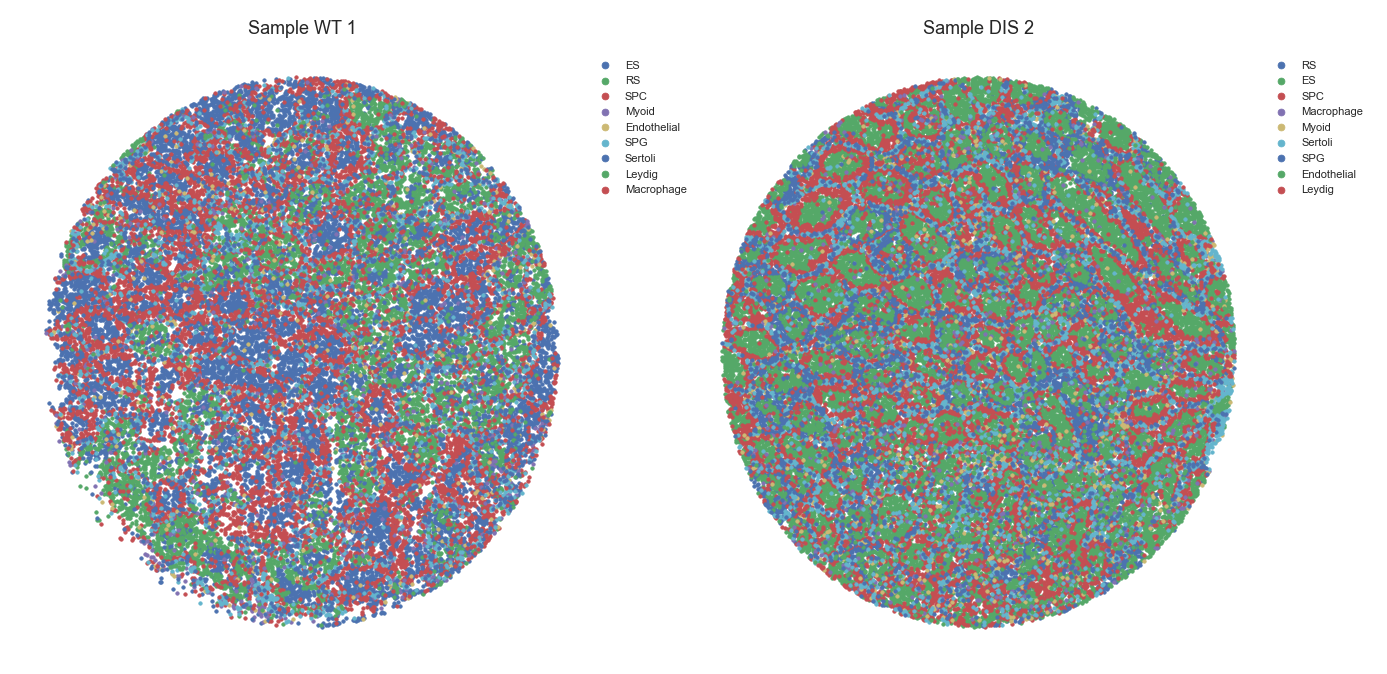

In [8]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 4))
tp.plot_utils.show_dataframe(df_wt1, title="Sample WT 1", ax=ax1, point_size=1.5)
tp.plot_utils.show_dataframe(df_dis2, title="Sample DIS 2", ax=ax2, point_size=1.5)

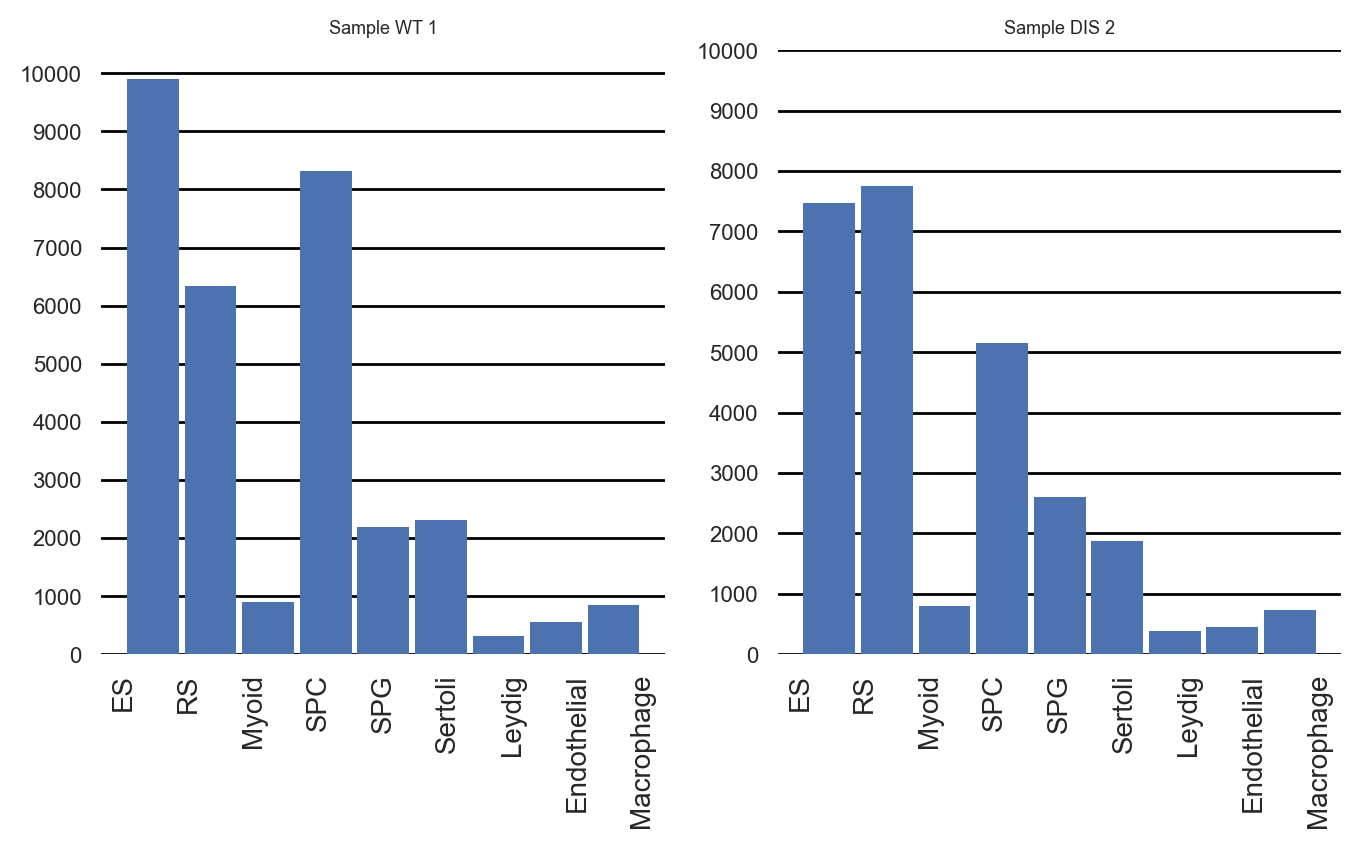

In [9]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 4))
tp.plot_utils.show_cell_count(df_wt1, title="Sample WT 1", ax=ax1)
tp.plot_utils.show_cell_count(df_dis1, title="Sample DIS 2", ax=ax2)

## Visualize Full Image

In [10]:
#device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [11]:
#image = tp.data_utils.SparseImage.from_panda(df_dis2, "x", "y", "cell_type", pixel_size=2)
#
#to_visualize = torchvision.transforms.Compose([
#    tp.data_utils.transforms.RandomGaussianBlur(sigma=(1.0, 1.0)),
#    tp.data_utils.transforms.ScaleIntensity(in_range='image', out_range=(0.0, 1.0)),
#])
#    
#image = to_visualize(image.to_dense().to(device))
#
#print(image.shape)

In [12]:
#labels = ['ES', 'RS', 'Myoid', 'SPC', 'SPG', 'Sertoli', 'Leydig', 'Endothelial', 'Macrophage']
#tp.plot_utils.show_raw_all_channels(image, cmap="tab10", intensity_scale_factor=3, labels=labels)

## Create the train and test dataset using all the tissue

In [13]:
from tissue_purifier.data_utils.helpers import define_test_loader, define_train_loader

all_df = [df_wt1, df_wt2, df_wt3, df_dis1, df_dis2, df_dis3]
labels_sparse_images = [0, 0, 0, 1, 1, 1]
names_sparse_images = ["wt1", "wt2", "wt3", "dis1", "dis2", "dis3"]

sparse_images = [
    tp.data_utils.SparseImage.from_panda(
        df,
        "x",
        "y",
        category="cell_type",
        pixel_size=config["data"]["PIXEL_SIZE"],
        padding=10,
    )
    for df in all_df
]

testloader = define_test_loader(sparse_images, labels_sparse_images, names_sparse_images, config)
trainloader = define_train_loader(sparse_images, labels_sparse_images, names_sparse_images, config)

number of elements ---> 31659
The dense shape of the image is -> torch.Size([9, 1168, 1168])
number of elements ---> 33059
The dense shape of the image is -> torch.Size([9, 1170, 845])
number of elements ---> 39206
The dense shape of the image is -> torch.Size([9, 1169, 1170])
number of elements ---> 27194
The dense shape of the image is -> torch.Size([9, 1166, 1170])
number of elements ---> 42776
The dense shape of the image is -> torch.Size([9, 1170, 1170])
number of elements ---> 33441
The dense shape of the image is -> torch.Size([9, 1154, 1155])
-------------
Test dataset
len(test_dataset.imgs) --> 139
cropping strategy -------> tiling
-------------
-------------
Train dataset
minibatch strategy ----> single_tissue
cropping strategy -----> tiling
batch_size_desired ----> 256
n_crops_for_tissue ----> 256
batch_size_dataloader -> 1
-------------


## Visualize the augmentations

In [137]:
from tissue_purifier.model_utils.helpers import define_simclr
import yaml

with open("./config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)

simclr = define_simclr(config)

#list_imgs, list_labels, list_metadata = testloader.load(index=[0,1,2,3,4,5])
list_imgs, list_labels, list_metadata = next(iter(testloader))

ref_transf = simclr.predict_transform['ref_trsfm']
train_transf0 = simclr.train_transform[0]
train_transf1 = simclr.train_transform[1]

print(ref_transf)
print(train_transf0)
print(train_transf1)

imgs0 = ref_transf(list_imgs[:3])
imgs1 = train_transf0(list_imgs[:3])
imgs2 = train_transf1(list_imgs[:3])

Compose(
    SparseToDense
    Rasterize(sigma=(1.0,1.0))
    RandomAffine(degrees=[-180.0, 180.0], shear=[-0.0, 0.0], interpolation=bilinear)
    CenterCrop(size=(224, 224))
    RandomVFlip(pflip=0.5)
    RandomHFlip(pflip=0.5)
    Resize(size=224, interpolation=bilinear)
)
Compose(
    DropoutSparseTensor(dropout=(0.0,0.25))
    SparseToDense
    Rasterize(sigma=(1.0,1.0))
    RandomAffine(degrees=[-180.0, 180.0], shear=[-0.0, 0.0], interpolation=bilinear)
    Elastic2D(length_scale=40.0, translate_max=0.1)
    CenterCrop(size=(224, 224))
    RandomStraightCut(p=1.0, occlusion_fraction=(0.1,0.4))
    Resize(size=224, interpolation=bilinear)
)
Compose(
    DropoutSparseTensor(dropout=(0.25,0.5))
    SparseToDense
    Rasterize(sigma=(1.0,1.0))
    RandomAffine(degrees=[-180.0, 180.0], translate=(0.1, 0.1), scale=[0.75, 1.25], shear=[-0.0, 0.0], interpolation=bilinear)
    Elastic2D(length_scale=40.0, translate_max=0.1)
    CenterCrop(size=(224, 224))
    RandomVFlip(pflip=0.5)
    Ran

In [141]:
a = tp.plot_utils.show_raw_all_channels(imgs0, cmap="viridis", n_col=3)

In [142]:
type(a)

matplotlib.figure.Figure

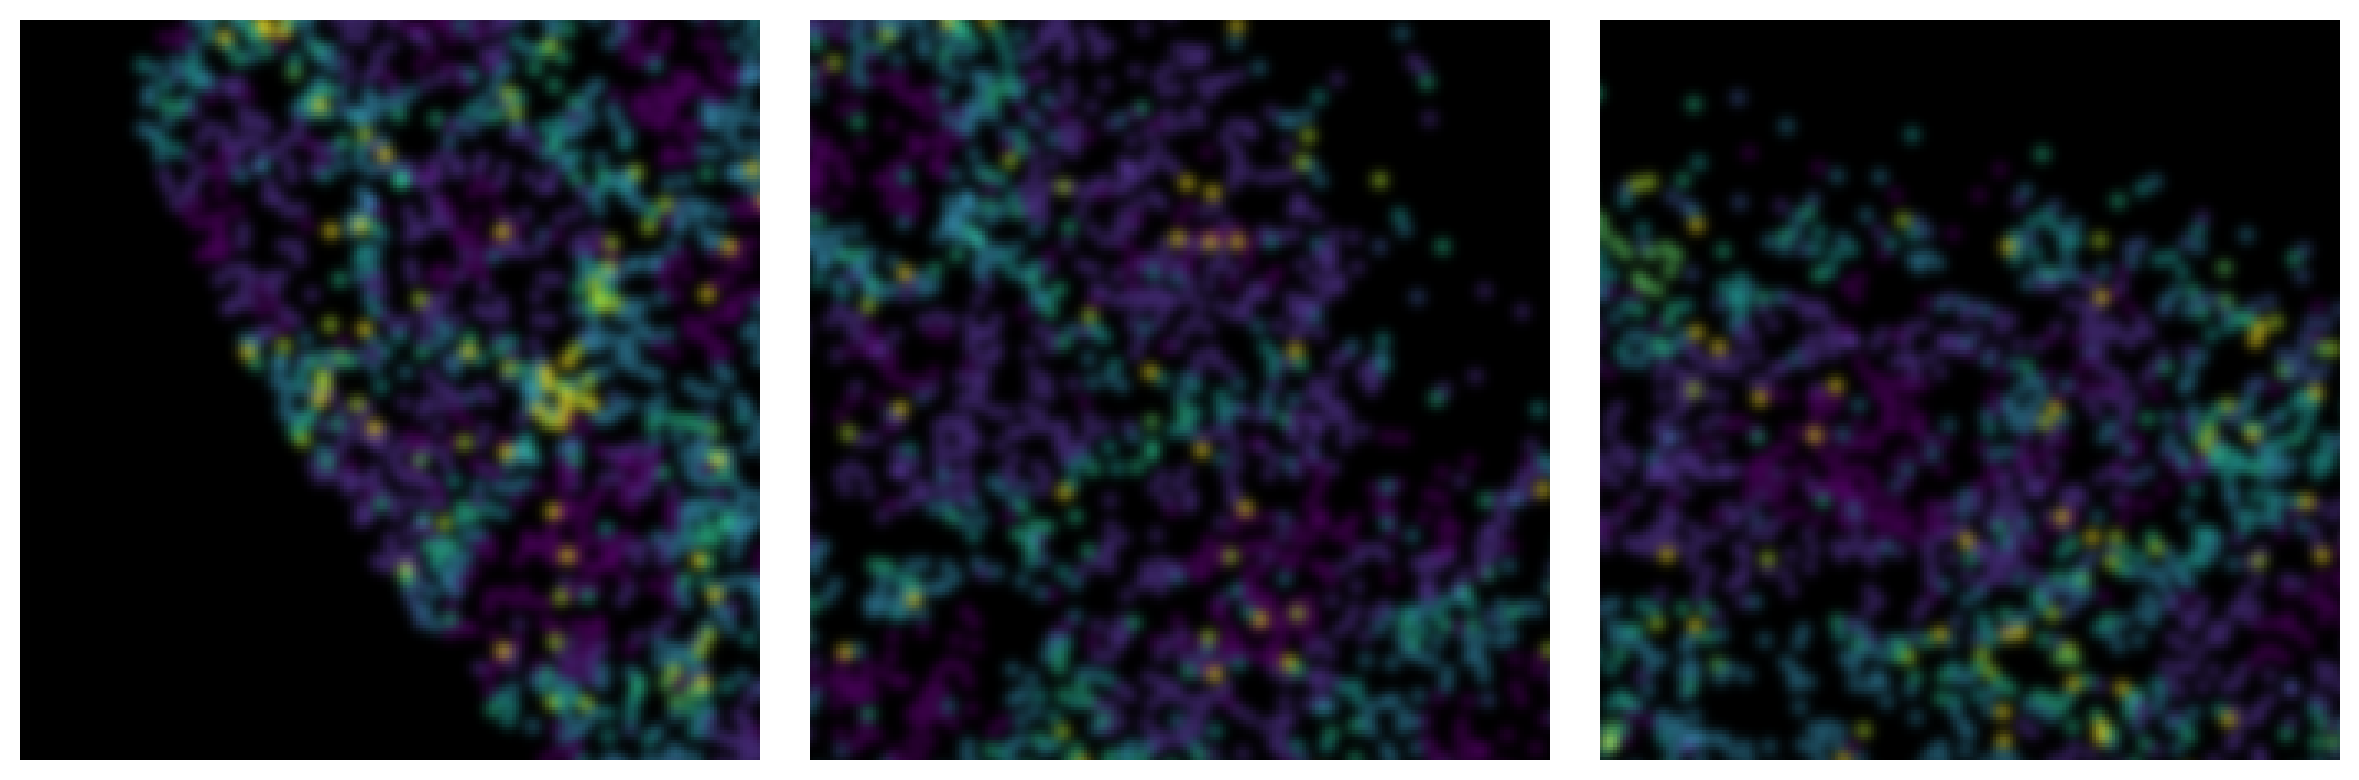

In [138]:
tp.plot_utils.show_raw_all_channels(imgs0, cmap="viridis", n_col=3)

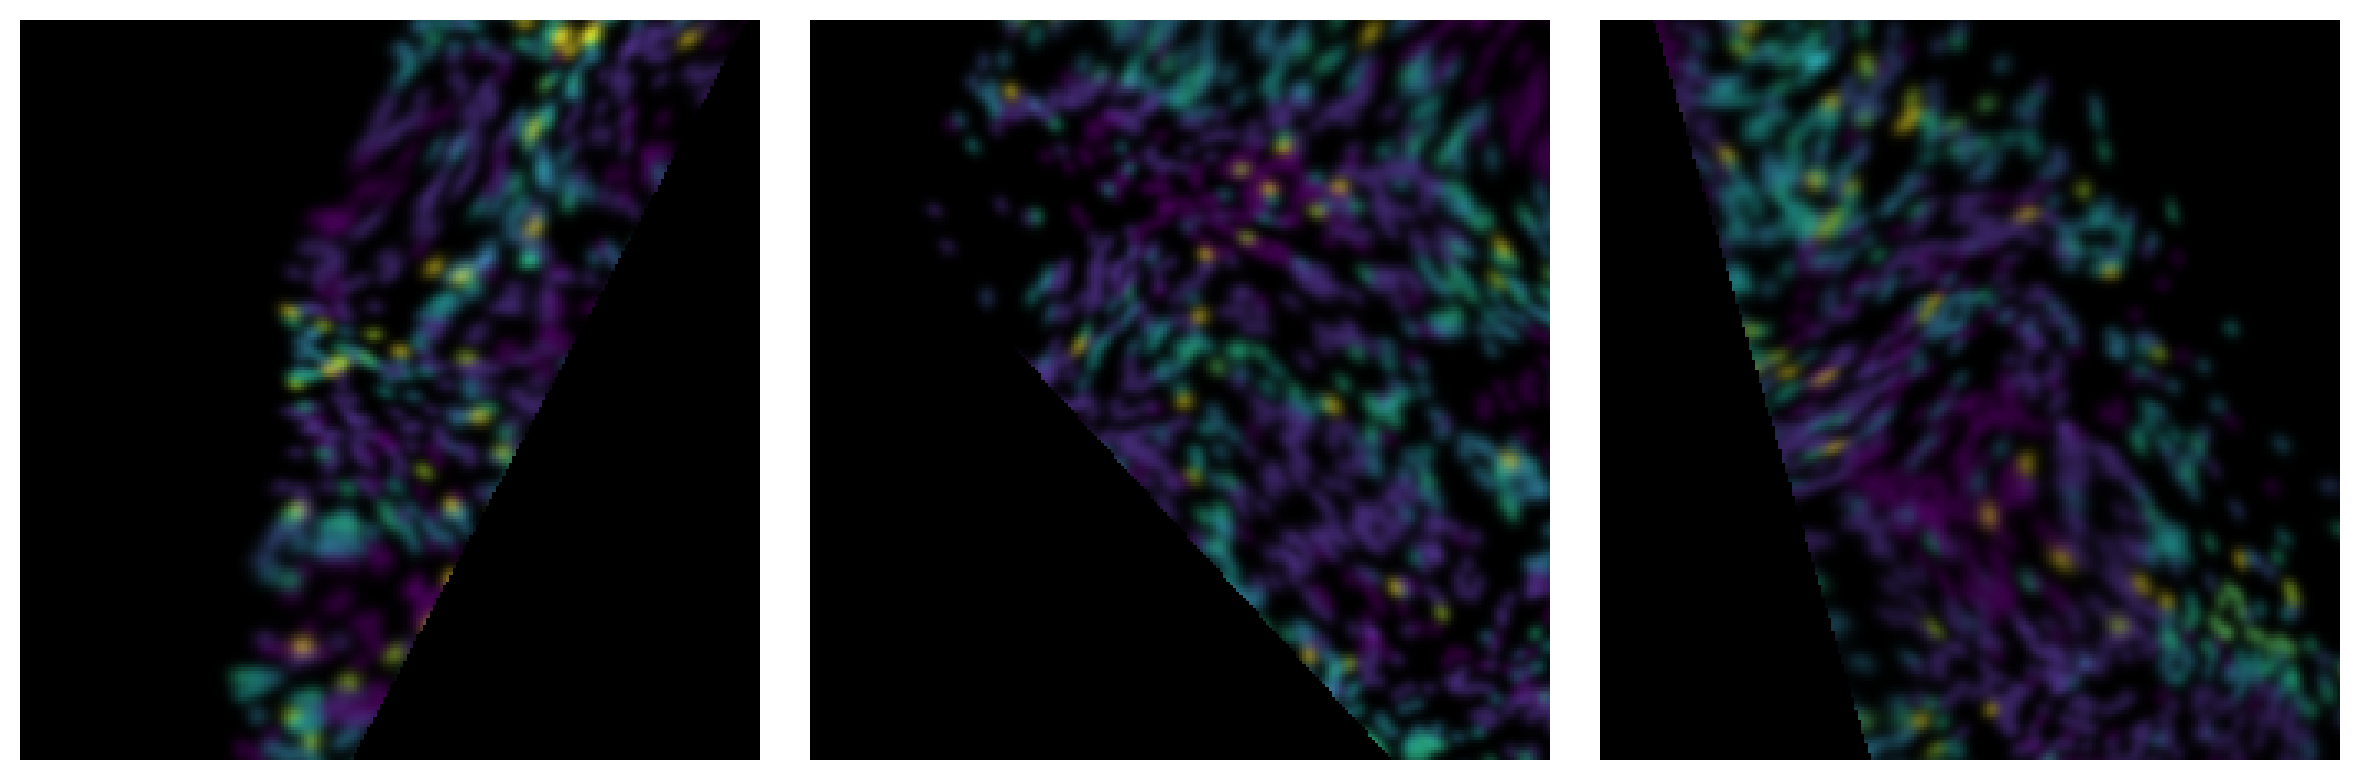

In [139]:
tp.plot_utils.show_raw_all_channels(imgs1, cmap="viridis", n_col=3)

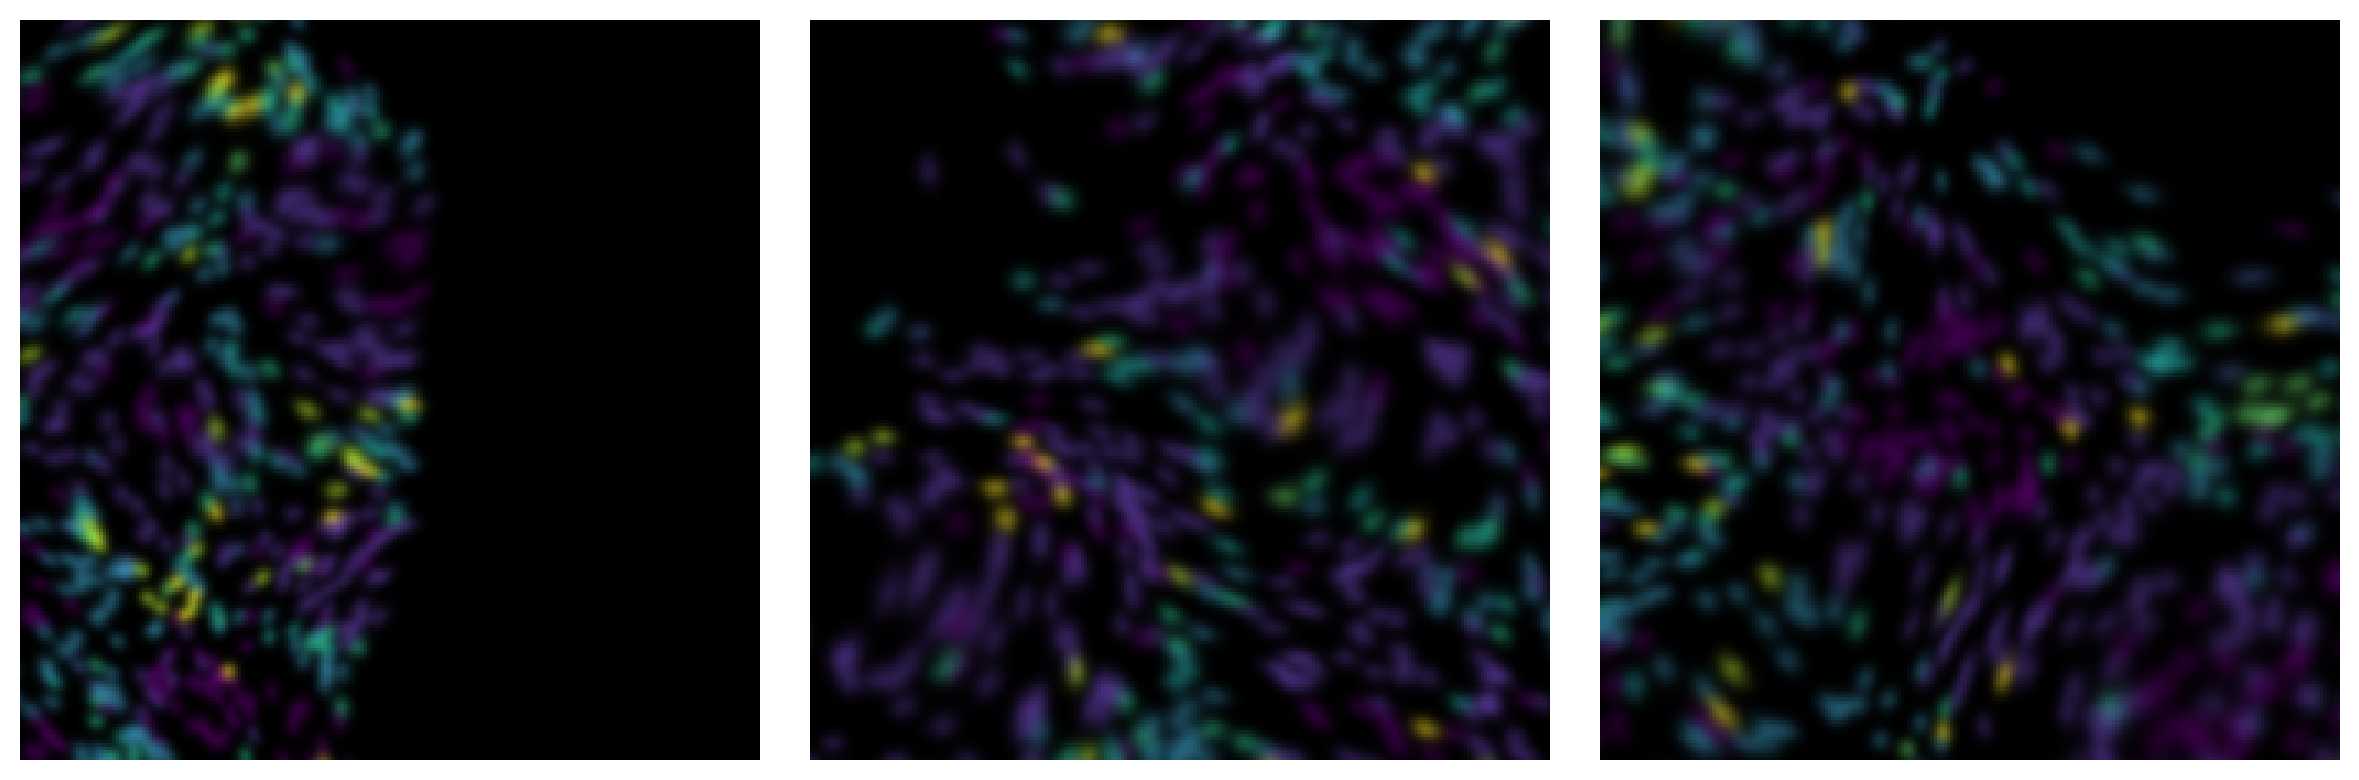

In [140]:
tp.plot_utils.show_raw_all_channels(imgs2, cmap="viridis", n_col=3)